In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28 * 28)

In [5]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y_train)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [7]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot = np.array(y_train_onehot, dtype="float32")

In [8]:
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot = np.array(y_test_onehot, dtype="float32")

In [10]:
model = Sequential()
model.add(Dense(200, input_dim = 28*28, activation="sigmoid"))
model.add(Dense(10, input_dim = 200, activation="softmax"))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["acc"])

In [14]:
model.fit(X_train, y_train_onehot, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.5082 - acc: 0.8636
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2893 - acc: 0.9182
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2627 - acc: 0.9254
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2460 - acc: 0.9304
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2303 - acc: 0.9334
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2223 - acc: 0.9358
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2112 - acc: 0.9384
Epoch 8/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2021 - acc: 0.9396
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2057 - acc: 0.9381
Epoch 10/10
60000/60000 [===========================

In [15]:
pred = model.predict(X_test)
pred

array([[1.6698625e-06, 1.0161732e-06, 2.2711914e-05, ..., 9.9972290e-01,
        1.1069732e-06, 6.2039549e-06],
       [1.4003487e-03, 8.6677372e-03, 9.6960628e-01, ..., 2.1409708e-06,
        2.2326829e-03, 3.2751512e-05],
       [3.5394805e-07, 9.9837130e-01, 3.9094783e-04, ..., 9.8185483e-05,
        9.3297241e-04, 7.3530477e-06],
       ...,
       [8.7291204e-07, 1.4485452e-04, 5.9218950e-05, ..., 4.8131812e-03,
        1.9333242e-03, 3.6254511e-03],
       [1.6295817e-04, 3.0003709e-04, 6.5293549e-05, ..., 9.8298246e-05,
        4.9833376e-02, 1.0995241e-04],
       [3.8741840e-05, 2.6619985e-06, 3.3538410e-04, ..., 7.6833453e-07,
        1.0934373e-05, 2.9616529e-06]], dtype=float32)

In [22]:
pred01 = np.argmax(pred, 1)
pred01 = pred01.reshape(-1, 1)
pred01

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=int64)

In [24]:
pred02 = (pred01 == y_test)
pred02

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [27]:
pred02 = np.array(pred02, dtype="float32")
acc = np.sum(pred02)/len(pred02)
acc

0.9411

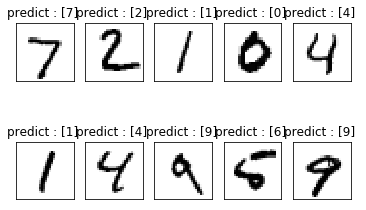

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title(f'predict : {pred01[i]} ')
    
    subplot.imshow(X_test[i].reshape((28, 28)),
                  cmap = plt.cm.gray_r)
    
plt.show()